<a href="https://colab.research.google.com/github/DeveloperAkram/Colab-Notebooks/blob/master/5001_Assignment_On_Data_Science_and_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# For Manipulations
import numpy as np
import pandas as pd

# For Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For Interactivity
from ipywidgets import interact

In [99]:
# Lets read the dataset

from google.colab import drive
drive.mount('/content/akramchowdhury')

Drive already mounted at /content/akramchowdhury; to attempt to forcibly remount, call drive.mount("/content/akramchowdhury", force_remount=True).


In [100]:
dataset = pd.read_csv('/content/akramchowdhury/MyDrive/Colab Notebooks/Paper Project : Optimizing the Agriculture Production/data.csv')

In [101]:
# Check the shape of dataset

print('Shape of the Dataset: ', dataset.shape)

Shape of the Dataset:  (2200, 8)


In [102]:
# Check the head of the dataset

dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [103]:
# Check if there is any missing value present in the dataset

dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [104]:
# Check the crops present in Dataset

dataset['label'].value_counts()

mothbeans      100
chickpea       100
banana         100
rice           100
orange         100
maize          100
mungbean       100
pomegranate    100
grapes         100
muskmelon      100
watermelon     100
kidneybeans    100
blackgram      100
lentil         100
coconut        100
jute           100
mango          100
pigeonpeas     100
cotton         100
papaya         100
apple          100
coffee         100
Name: label, dtype: int64

In [105]:
# check the summary of all the crops

print("Average Ratio of Nitrogen in the Soil : {0: 0.2f}".format(dataset['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0: 0.2f}".format(dataset['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0: 0.2f}".format(dataset['K'].mean()))
print("Average Temparture in Celsius : {0: 0.2f}".format(dataset['temperature'].mean()))
print("Average Relative Humidity in % : {0: 0.2f}".format(dataset['humidity'].mean()))
print("Average PH value of the Soil : {0: 0.2f}".format(dataset['ph'].mean()))
print("Average Rainfall in nn : {0: 0.2f}".format(dataset['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil :  50.55
Average Ratio of Phosphorous in the Soil :  53.36
Average Ratio of Potassium in the Soil :  48.15
Average Temparture in Celsius :  25.62
Average Relative Humidity in % :  71.48
Average PH value of the Soil :  6.47
Average Rainfall in nn :  103.46


In [106]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [107]:
# Check the summary Statistics for each of the Crops

@interact
def summary(crops = list(dataset['label'].value_counts().index)):
  x = dataset[dataset['label'] == crops]
  print("------------------------------------------------")
  print("Statistics for Nitrogen")
  print("Minimum Nitrogen required : ", x['N'].min())
  print("Average Nitrogen required : ", x['N'].mean())
  print("Maximum Nitrogen required : ", x['N'].max())
  print("------------------------------------------------")
  print("Statistics for Phosphorous")
  print("Minimum Phosphorous required : ", x['P'].min())
  print("Average Phosphorous required : ", x['P'].mean())
  print("Maximum Phosphorous required : ", x['P'].max())
  print("------------------------------------------------")
  print("Statistics for Potassium")
  print("Minimum Potassium required : ", x['K'].min())
  print("Average Potassium required : ", x['K'].mean())
  print("Maximum Potassium required : ", x['K'].max())
  print("------------------------------------------------")
  print("Statistics for Temperature")
  print("Minimum Temperature required : {0: 0.2f}".format(x['temperature'].min()))
  print("Average Temperature required : {0: 0.2f}".format(x['temperature'].mean()))
  print("Maximum Temperature required : {0: 0.2f}".format(x['temperature'].max()))
  print("------------------------------------------------")
  print("Statistics for Humidity")
  print("Minimum Humidity required : {0: 0.2f}".format(x['humidity'].min()))
  print("Average Humidity required : {0: 0.2f}".format(x['humidity'].mean()))
  print("Maximum Humidity required : {0: 0.2f}".format(x['humidity'].max()))
  print("------------------------------------------------")
  print("Statistics for PH")
  print("Minimum PH required : {0: 0.2f}".format(x['ph'].min()))
  print("Average PH required : {0: 0.2f}".format(x['ph'].mean()))
  print("Maximum PH required : {0: 0.2f}".format(x['ph'].max()))
  print("------------------------------------------------")
  print("Statistics for Rainfall")
  print("Minimum Rainfall required : {0: 0.2f}".format(x['rainfall'].min()))
  print("Average Rainfall required : {0: 0.2f}".format(x['rainfall'].mean()))
  print("Maximum Rainfall required : {0: 0.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('mothbeans', 'chickpea', 'banana', 'rice', 'orang…

In [108]:
# compare the average requirement for each crops with average conditions

@interact
def compare(conditions = ["N", "P", "K", "temperature", "ph", "humidity", "rainfall"]):
  print("Average Value for", conditions, "is {0:.2f}".format(dataset[conditions].mean()))
  print("-----------------------------------------------------------")
  print("Rice : {0: .2f}".format(dataset[(dataset['label'] == 'rice')][conditions].mean()))
  print("Black Grams : {0: .2f}".format(dataset[(dataset['label'] == 'blackgram')][conditions].mean()))
  print("Banana : {0: .2f}".format(dataset[(dataset['label'] == 'banana')][conditions].mean()))
  print("Jute : {0: .2f}".format(dataset[(dataset['label'] == 'jute')][conditions].mean()))
  print("Coconut : {0: .2f}".format(dataset[(dataset['label'] == 'coconut')][conditions].mean()))
  print("Apple : {0: .2f}".format(dataset[(dataset['label'] == 'apple')][conditions].mean()))
  print("Papaya : {0: .2f}".format(dataset[(dataset['label'] == 'papaya')][conditions].mean()))
  print("Muskmelon : {0: .2f}".format(dataset[(dataset['label'] == 'muskmelon')][conditions].mean()))
  print("Grapes : {0: .2f}".format(dataset[(dataset['label'] == 'grapes')][conditions].mean()))
  print("Watermelon : {0: .2f}".format(dataset[(dataset['label'] == 'watermelon')][conditions].mean()))
  print("Kidney Beans : {0: .2f}".format(dataset[(dataset['label'] == 'kidneybeans')][conditions].mean()))
  print("Mung Beans: {0: .2f}".format(dataset[(dataset['label'] == 'mungbean')][conditions].mean()))
  print("Oranges : {0: .2f}".format(dataset[(dataset['label'] == 'orange')][conditions].mean()))
  print("Chick Peas : {0: .2f}".format(dataset[(dataset['label'] == 'chickpea')][conditions].mean()))
  print("Lentils : {0: .2f}".format(dataset[(dataset['label'] == 'lentil')][conditions].mean()))
  print("Cotton : {0: .2f}".format(dataset[(dataset['label'] == 'cotton')][conditions].mean()))
  print("Maize : {0: .2f}".format(dataset[(dataset['label'] == 'maize')][conditions].mean()))
  print("Moth Beans : {0: .2f}".format(dataset[(dataset['label'] == 'mothbeans')][conditions].mean()))
  print("Pigeon Peas : {0: .2f}".format(dataset[(dataset['label'] == 'pigeonpeas')][conditions].mean()))
  print("Mango : {0: .2f}".format(dataset[(dataset['label'] == 'mango')][conditions].mean()))
  print("Pomegranate : {0: .2f}".format(dataset[(dataset['label'] == 'pomegranate')][conditions].mean()))
  print("Coffee : {0: .2f}".format(dataset[(dataset['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [109]:
# Make this funtion more Intuitive

@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
  print("Crops which require greater than average ", conditions, '\n')
  print(dataset[dataset[conditions] > dataset[conditions].mean()]['label'].unique())
  print("--------------------------------------------------------------")
  print("Crops which require less than average", conditions, '\n')
  print(dataset[dataset[conditions] <= dataset[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

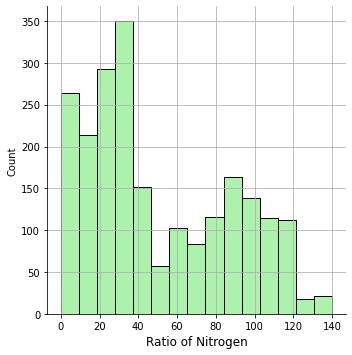

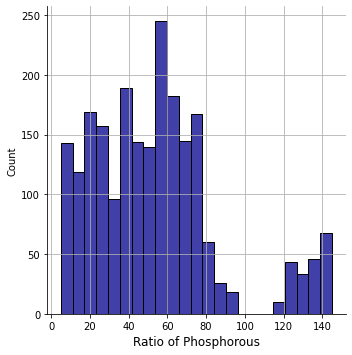

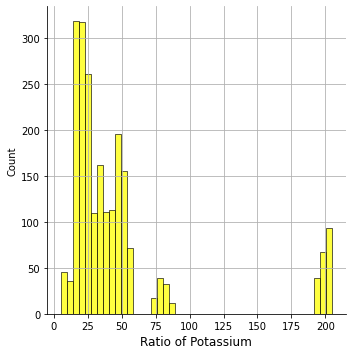

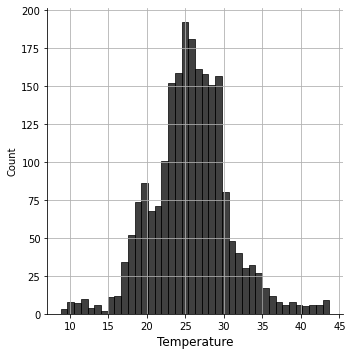

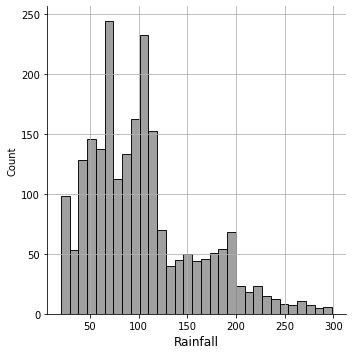

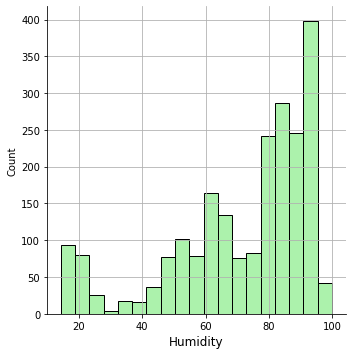

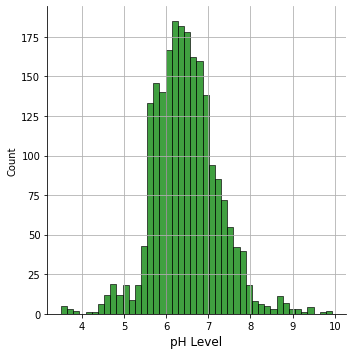

In [110]:
# Distribution for Agricultural Condition

sns.displot(dataset['N'], color= 'lightgreen')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()
plt.show()

sns.displot(dataset['P'], color= 'darkblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()
plt.show()

sns.displot(dataset['K'], color= 'yellow')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()
plt.show()

sns.displot(dataset['temperature'], color= 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()
plt.show()

sns.displot(dataset['rainfall'], color= 'gray')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()
plt.show()

sns.displot(dataset['humidity'], color= 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()
plt.show()

sns.displot(dataset['ph'], color= 'green')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()
plt.show()

In [111]:
# Find out some Interesting facts

print("Some Interesting Patterns")
print("--------------------------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", dataset[dataset['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", dataset[dataset['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", dataset[dataset['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", dataset[dataset['rainfall'] > 200]['label'].unique())
print("Crops which requires very High Temperature:", dataset[dataset['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Temperature:", dataset[dataset['temperature'] < 10]['label'].unique())
print("Crops which requires very Low Humidity:", dataset[dataset['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", dataset[dataset['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", dataset[dataset['ph'] > 9]['label'].unique())

Some Interesting Patterns
--------------------------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very High Temperature: ['grapes' 'papaya']
Crops which requires very Low Temperature: ['grapes']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [112]:
# Understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(dataset[(dataset['temperature'] > 30) & (dataset['humidity'] > 50)]['label'].unique())
print("Winter Crops")
print(dataset[(dataset['temperature'] < 20) & (dataset['humidity'] > 30)]['label'].unique())
print("Rainy Crops")
print(dataset[(dataset['rainfall'] > 200) & (dataset['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops
['rice' 'papaya' 'coconut']


In [113]:
from sklearn.cluster import KMeans

# removing the labels column
X = dataset.drop(['label'], axis = 1)

# selecting all the value of the data
X = X.values

# checking the shape
print(X.shape)

(2200, 7)


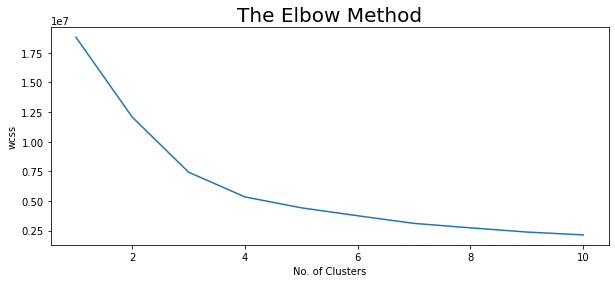

In [114]:
 # Determine the Optimum Number of Clusters within the Dataset

 plt.rcParams['figure.figsize'] = (10, 4)

 wcss = []
 for i in range(1, 11):
   km = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 42)
   km.fit(X)
   wcss.append(km.inertia_)

# Plot the results

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [115]:
# Implementation the K Means algorithm to perform Clustering analysis

km = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 42)
y_means = km.fit_predict(X)

# Find out the results

a = dataset['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# Check the Clusters of each Crops

print("Check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("-----------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("-----------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("-----------------------------------------------------------------")
print("Crops in Forth Cluster:", z[z['cluster'] == 3]['label'].unique())

Check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
-----------------------------------------------------------------
Crops in Second Cluster: ['grapes' 'apple']
-----------------------------------------------------------------
Crops in Third Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
-----------------------------------------------------------------
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [116]:
# split the Dataset for predictive Modeling

y = dataset['label']
X = dataset.drop(['label'], axis = 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2200, 7)
Shape of y: (2200,)


In [117]:
# Create Training and Testing Sets for Validation of Results

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("The Shape of X train:", X_train.shape)
print("The Shape of X test:", X_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of X train: (1760, 7)
The Shape of X test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [118]:
# create a Predictive Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


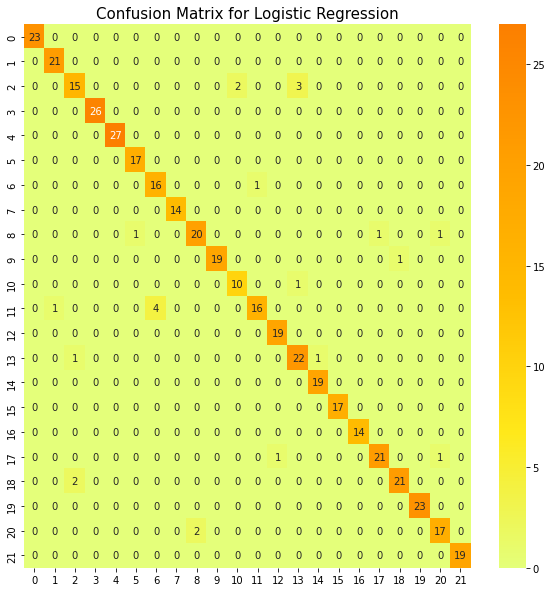

In [119]:
# Evaluate the Model Performance

from sklearn.metrics import confusion_matrix

# Print the Confusion matrix first

plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, cmap= 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

In [120]:
# Print the Classification Report
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.95    

In [121]:
# Check the Head of the Dataset

dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [122]:
prediction = model.predict((np.array([[90,
                                       40,
                                       40,
                                       20,
                                       80,
                                       7,
                                       200]])))
print("The Suggested Crop for Given Climatic Condition is:", prediction)

The Suggested Crop for Given Climatic Condition is: ['rice']
